In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#extracting the dataset
df=pd.read_csv('Admission_Predict_Ver1.1.csv')
print(df)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit   
0           1    

In [3]:
#splitting data in x and y
x=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values
print(x)
print(y)

[[337.   118.     4.   ...   4.5    9.65   1.  ]
 [324.   107.     4.   ...   4.5    8.87   1.  ]
 [316.   104.     3.   ...   3.5    8.     1.  ]
 ...
 [330.   120.     5.   ...   5.     9.56   1.  ]
 [312.   103.     4.   ...   5.     8.43   0.  ]
 [327.   113.     4.   ...   4.5    9.04   0.  ]]
[0.92 0.76 0.72 0.8  0.65 0.9  0.75 0.68 0.5  0.45 0.52 0.84 0.78 0.62
 0.61 0.54 0.66 0.65 0.63 0.62 0.64 0.7  0.94 0.95 0.97 0.94 0.76 0.44
 0.46 0.54 0.65 0.74 0.91 0.9  0.94 0.88 0.64 0.58 0.52 0.48 0.46 0.49
 0.53 0.87 0.91 0.88 0.86 0.89 0.82 0.78 0.76 0.56 0.78 0.72 0.7  0.64
 0.64 0.46 0.36 0.42 0.48 0.47 0.54 0.56 0.52 0.55 0.61 0.57 0.68 0.78
 0.94 0.96 0.93 0.84 0.74 0.72 0.74 0.64 0.44 0.46 0.5  0.96 0.92 0.92
 0.94 0.76 0.72 0.66 0.64 0.74 0.64 0.38 0.34 0.44 0.36 0.42 0.48 0.86
 0.9  0.79 0.71 0.64 0.62 0.57 0.74 0.69 0.87 0.91 0.93 0.68 0.61 0.69
 0.62 0.72 0.59 0.66 0.56 0.45 0.47 0.71 0.94 0.94 0.57 0.61 0.57 0.64
 0.85 0.78 0.84 0.92 0.96 0.77 0.71 0.79 0.89 0.82 0.76 0.71 

In [4]:
#perform Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.81923762,  1.77886545,  0.77558214, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.66714832, -0.03160087,  0.77558214, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.0418297 , -0.52536441, -0.09979274, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.19888185,  2.10804114,  1.65095702, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39631872, -0.68995225,  0.77558214, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.93301508,  0.95592621,  0.77558214, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [5]:
#checking any null value
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
#add constant column
x_temp=np.append(arr=np.ones((500,1)),values=x,axis=1)
x_temp

array([[ 1.        ,  1.81923762,  1.77886545, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 1.        ,  0.66714832, -0.03160087, ...,  1.09894429,
         0.48585943,  0.88640526],
       [ 1.        , -0.0418297 , -0.52536441, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.        ,  1.19888185,  2.10804114, ...,  1.63976333,
         1.62785086,  0.88640526],
       [ 1.        , -0.39631872, -0.68995225, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 1.        ,  0.93301508,  0.95592621, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [7]:
#find pvalue 
import statsmodels.api as sm
stats=sm.OLS(endog=y,exog=x_temp).fit()
stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Sat, 17 Oct 2020   Prob (F-statistic):          8.21e-180
Time:                        15:36:15   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7217      0.003    269.039      0.000       0.716       0.727
x1             0.0210      0.006      3.700      0.000       0.010       0.032
x2             0.0169      0.005      3.184      0.002       0.006       0.027
x3             0.0068      0.004      1.563      0.119      -0.002       0.015
x4             0.0016      0.005      0.348      0.728      -0.007       0.010
x5             0.0156      0.004      4.074      0.000       0.008       0.023
x6             0.0715      0.006     12.198      0.000       0.060       0.083
x7             0.0121      0.003      3.680      0.000       0.006       0.019
==============================================================================
Omnibus:                      112.770   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.104
Skew:                          -1.160   Prob(JB):                     1.22e-57
Kurtosis:                       5.684   Cond. No.                         5.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#eliminate > 0.5 pvalue column
x_temp=np.array(x_temp[:,[0,1,2,4,5,6,7]],dtype=float)
stats=sm.OLS(endog=y,exog=x_temp).fit()
stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     376.9
Date:                Sat, 17 Oct 2020   Prob (F-statistic):          1.37e-180
Time:                        15:36:15   Log-Likelihood:                 700.15
No. Observations:                 500   AIC:                            -1386.
Df Residuals:                     493   BIC:                            -1357.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7217      0.003    268.647      0.000       0.716       0.727
x1             0.0214      0.006      3.775      0.000       0.010       0.033
x2             0.0176      0.005      3.329      0.001       0.007       0.028
x3             0.0042      0.004      0.991      0.322      -0.004       0.012
x4             0.0164      0.004      4.333      0.000       0.009       0.024
x5             0.0728      0.006     12.531      0.000       0.061       0.084
x6             0.0123      0.003      3.767      0.000       0.006       0.019
==============================================================================
Omnibus:                      112.527   Durbin-Watson:                   0.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.849
Skew:                          -1.158   Prob(JB):                     2.28e-57
Kurtosis:                       5.675   Cond. No.                         5.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#split train set and test set
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x_temp,y,test_size=0.2,random_state=10)

In [10]:
y_tr,y_te

(array([0.74, 0.91, 0.74, 0.73, 0.92, 0.43, 0.77, 0.47, 0.79, 0.68, 0.45,
        0.71, 0.63, 0.64, 0.79, 0.75, 0.76, 0.54, 0.7 , 0.73, 0.68, 0.94,
        0.79, 0.81, 0.81, 0.67, 0.71, 0.79, 0.71, 0.94, 0.93, 0.73, 0.8 ,
        0.85, 0.5 , 0.55, 0.67, 0.75, 0.8 , 0.85, 0.57, 0.64, 0.58, 0.61,
        0.69, 0.78, 0.86, 0.96, 0.9 , 0.65, 0.94, 0.49, 0.79, 0.64, 0.89,
        0.74, 0.93, 0.71, 0.74, 0.89, 0.83, 0.63, 0.96, 0.78, 0.72, 0.77,
        0.84, 0.78, 0.44, 0.77, 0.52, 0.68, 0.77, 0.54, 0.61, 0.52, 0.69,
        0.73, 0.61, 0.72, 0.7 , 0.72, 0.65, 0.95, 0.94, 0.7 , 0.78, 0.78,
        0.57, 0.38, 0.79, 0.36, 0.71, 0.73, 0.46, 0.66, 0.68, 0.69, 0.81,
        0.39, 0.34, 0.72, 0.87, 0.54, 0.76, 0.87, 0.87, 0.82, 0.65, 0.8 ,
        0.72, 0.42, 0.56, 0.94, 0.94, 0.59, 0.71, 0.71, 0.64, 0.64, 0.82,
        0.93, 0.66, 0.92, 0.65, 0.71, 0.72, 0.7 , 0.57, 0.78, 0.62, 0.65,
        0.74, 0.84, 0.93, 0.42, 0.69, 0.71, 0.64, 0.8 , 0.78, 0.58, 0.47,
        0.59, 0.79, 0.71, 0.86, 0.91, 

Wall time: 0 ns


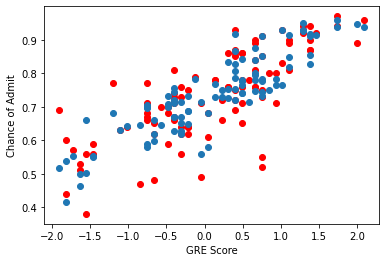

In [11]:
#RFA graph for GRE
%time
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100,random_state=0)
regressor.fit(x_tr,y_tr)
y_pred=regressor.predict(x_te)
plt.scatter(x_te[:,1],y_te,c="red")
plt.scatter(x_te[:,1],y_pred)
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.show()



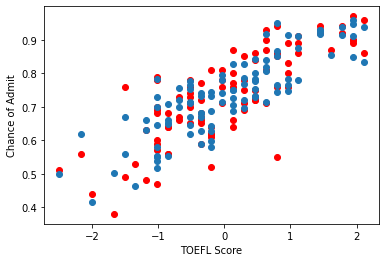

In [12]:
#graph for TOEFL
plt.scatter(x_te[:,2],y_te,c="red")
plt.scatter(x_te[:,2],y_pred)
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admit")
plt.show()

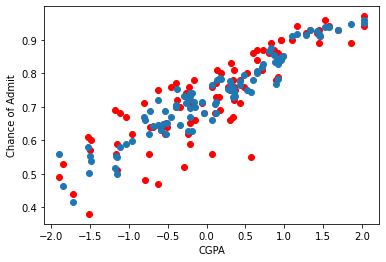

In [13]:
#graph for CGPA
plt.scatter(x_te[:,5],y_te,c="red")
plt.scatter(x_te[:,5],y_pred)
plt.xlabel("CGPA")
plt.ylabel("Chance of Admit")
plt.show()

In [26]:
#Find mean_absolute_error,mean_squared_error,explained_variance_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
mae=mean_absolute_error(y_te,y_pred)
mse=mean_squared_error(y_te,y_pred)
rmse=np.sqrt(mse)
rsq=explained_variance_score(y_te,y_pred)
print(" mean_squared_error      ",mse)
print("mean_absolute_error      ",mae)
print("root mean_squared_error ",rmse) 
print("R-square                 ",rsq)
 

 mean_squared_error       0.003906680899999996
mean_absolute_error       0.04353100000000001
root mean_squared_error  0.0625034471049397
R-square                  0.7739737476559324


In [ ]:
q=np.array([[302,101,2,2.5,2,7.96,0]])
y_pred=regressor.predict(q)
print(y_pred)